<a href="https://colab.research.google.com/github/EdibHamzaArslan/Face2Vec-with-CelebaDataset/blob/main/SlimCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from data.preprocessing import DataProcess
from models.slim_cnn import SlimCNN
from models.config import Config


img_path = 'img_align_celeba/img_align_celeba'
data_path = 'CelebFaces/'
train_path = 'CelebFaces/Train'
val_path = 'CelebFaces/Validation'
test_path ='CelebFaces/Test'
attribute_data_path = 'list_attr_celeba.csv'
preprocessing = DataProcess(img_path, data_path, train_path, val_path, test_path, attribute_data_path)

preprocessing.download_data()
preprocessing.seperate_data()

Kaggle.json is successfully setuped.
Celeba Downloaded
Data seperation is successfully.
Downloaded data is deleted


In [ ]:
train_gen = preprocessing.create_train_gen()
val_gen = preprocessing.create_val_gen()
test_gen = preprocessing.create_test_gen()

In [ ]:
filters = Config()
model = SlimCNN(filters.layers, 
                filters.conv_filter_size, 
                filters.conv_filter, 
                filters.conv_stride, 
                filters.max_pool_filter, 
                filters.max_pool_stride)

model = model.my_compile(model, dynamic_mode=False)
model.summary()

Model: "slim_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 89, 109, 96)       14208     
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 109, 96)       384       
_________________________________________________________________
slim_module (SlimModule)     (None, 44, 54, 48)        30896     
_________________________________________________________________
slim_module_1 (SlimModule)   (None, 21, 26, 96)        72544     
_________________________________________________________________
slim_module_2 (SlimModule)   (None, 10, 12, 144)       166416    
_________________________________________________________________
slim_module_3 (SlimModule)   (None, 4, 5, 192)         298688    
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0  

In [ ]:
from train import TrainingLoop
EPOCHS = 100
training = TrainingLoop(model, EPOCHS)
train_accs, train_losses, val_accs, val_losses = training.train(train_gen, val_gen)


epoch 1/100
-------------------
Training acc: 0.8336
Training loss: 0.3728
-------------------
Validation acc: 0.8506
Validation loss: 0.3461
-------------------
Model is saving slim_cnn_model.000.0.35.h5
Time taken: 960.49s

epoch 2/100
-------------------
Training acc: 0.8774
Training loss: 0.2798
-------------------
Validation acc: 0.8785
Validation loss: 0.2798
-------------------
Model is saving slim_cnn_model.001.0.28.h5
Time taken: 925.14s

epoch 3/100
-------------------
Training acc: 0.8903
Training loss: 0.2491
-------------------
Validation acc: 0.8893
Validation loss: 0.2547
-------------------
Model is saving slim_cnn_model.002.0.25.h5
Time taken: 925.57s

epoch 4/100
-------------------
Training acc: 0.8969
Training loss: 0.2335
-------------------
Validation acc: 0.8911
Validation loss: 0.2483
-------------------
Model is saving slim_cnn_model.003.0.25.h5
Time taken: 926.44s

epoch 5/100
-------------------
Training acc: 0.9013
Training loss: 0.2237
-------------------


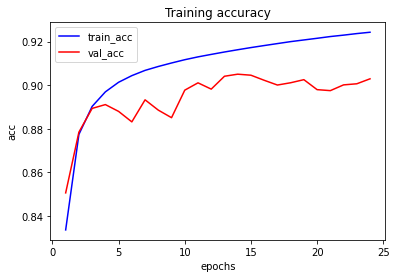

In [ ]:
import os
import matplotlib.pyplot as plt


train_acc, train_loss, val_acc, val_loss = train_accs, train_losses, val_accs, val_losses
model_result_path = 'Plots/'
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'b', label='train_acc')
plt.plot(epochs, val_acc, 'r', label='val_acc')
plt.title("Training accuracy")
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend() # plt.legend(loc='lower right')
if not os.path.exists(model_result_path):
  os.mkdir(model_result_path)
plt.savefig(os.path.join(model_result_path, 'Acc.png'))
plt.show()




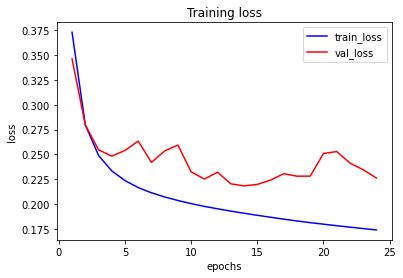

In [ ]:
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'b', label='train_loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title("Training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend() # plt.legend(loc='lower right')
if not os.path.exists(model_result_path):
  os.mkdir(model_result_path)
plt.savefig(os.path.join(model_result_path, 'Loss.png'))
plt.show()


In [ ]:
# !cp -r Checkpoints/ /content/drive/MyDrive/SlimCnn_savedWeights


In [ ]:
# !cp -r Plots/ /content/drive/MyDrive/SlimCnn_savedWeights

## THE FOLLOWING PARTS NOT INCLUDED IN PROJECT.

## OLD PROJECT AREA

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzaarslan","key":"c3519c3f84a6876f67f7104328cdc9c0"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.*zip

In [ ]:
import pandas as pd
import os
import numpy as np
import pathlib
# df = pd.read_csv('list_attr_celeba.csv')
# idx = df['image_id']
# idxs = []
# for i in idx:
#   idxs.append(os.path.join('img_align_celeba/img_align_celeba',i))
# idx = np.array(idxs)
face_root = pathlib.Path('img_align_celeba/img_align_celeba')
list_ds = tf.data.Dataset.list_files(str(face_root/'*'))
# list_ds = tf.data.Dataset.list_files(idx)
# file_path = next(iter(list_ds))


In [ ]:
file_path

In [ ]:
import tensorflow as tf
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # image = tf.image.resize(image, [128, 128])
  return image

In [ ]:
# image = parse_image(file_path)
import matplotlib.pyplot as plt


def show(image):
  plt.figure()
  plt.imshow(image)
  # plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

# show(image)

In [ ]:
import time 
start_time = time.time()
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = list_ds.cache().prefetch(buffer_size=AUTOTUNE)
# image_ds = list_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE).batch(10) # .shuffle(buffer_size=100).batch(64)

images_ds = list_ds.map(parse_image).batch(10)
for image in image_ds.take(64):
  # show(image)
  continue
print("Time taken: %.2fs" % (time.time() - start_time))

Time taken: 0.77s


In [ ]:
from utils import DataCleaning, DataSeperator, DataGenerator
from models.slim_cnn import SlimCNN
from models.config import Config
import tensorflow as tf

In [ ]:
seperator = DataSeperator()


seperator.create_data_paths()

df = seperator.read_attribute_data()
cleaning = DataCleaning(df)
df = cleaning.replace()

img_id_list = list(df['image_id'].to_numpy())
seperator.seperate_big_data_to_data_path(img_id_list)

train_df = df[seperator.train_start : seperator.train_start + 2000 ]
valid_df = df[seperator.val_start : seperator.val_start + 1000]
test_df = df[seperator.test_start: seperator.test_start + 1000]


BATCH_SIZE = 64
## Data Generator for training
train_img_file_list = list(train_df['image_id'].to_numpy())
train_list_IDs = np.array(train_df.drop('image_id', axis=1))
train_gen = DataGenerator(DataSeperator().train_path, list_IDs=train_list_IDs, labels=train_img_file_list, batch_size=BATCH_SIZE, shuffle=True)

## Data Generator for validation
valid_img_file_list = list(valid_df['image_id'].to_numpy())
valid_list_IDs = np.array(valid_df.drop('image_id', axis=1))
valid_gen = DataGenerator(DataSeperator().vald_path, list_IDs=valid_list_IDs, labels=valid_img_file_list, batch_size=BATCH_SIZE, shuffle=True)


## Data Generator for testing
test_img_file_list = list(test_df['image_id'].to_numpy())
test_list_IDs = np.array(test_df.drop('image_id', axis=1))
test_gen = DataGenerator(DataSeperator().test_path, list_IDs=test_list_IDs, labels=test_img_file_list, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# from keras_preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1/255.)
# validation_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)


# train_generator=train_datagen.flow_from_dataframe(dataframe=train_df,
#                                                   directory='Data/Train',
#                                                   x_col='image_id',
#                                                   y_col=train_df.columns[1:],
#                                                   batch_size=64,
#                                                   seed=42,
#                                                   shuffle=True,
#                                                   class_mode="raw",
#                                                   target_size=(178,218))


# valid_generator=test_datagen.flow_from_dataframe(dataframe=valid_df,
#                                                 directory='Data/Validation',
#                                                 x_col='image_id',
#                                                 y_col=valid_df.columns[1:],
#                                                 batch_size=64,
#                                                 seed=42,
#                                                 shuffle=True,
#                                                 class_mode="raw",
#                                                 target_size=(178,218))


# test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
#                                                 directory='Data/Test',
#                                                 x_col='image_id',
#                                                 y_col=test_df.columns[1:],
#                                                 batch_size=64,
#                                                 seed=42,
#                                                 shuffle=False,
#                                                 class_mode='raw',
#                                                 target_size=(178,218))

In [ ]:
filters = Config()
model = SlimCNN(filters.layers, 
                filters.conv_filter_size, 
                filters.conv_filter, 
                filters.conv_stride, 
                filters.max_pool_filter, 
                filters.max_pool_stride)

# inputs = tf.keras.layers.Input(shape=filters.input_size)
# model.build(input_shape=(None, 178, 218, 3))
# y = model.call(inputs)
model = model.my_compile(model dynamic_mode=False)
model.summary()


Model: "slim_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 89, 109, 96)       14208     
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 109, 96)       384       
_________________________________________________________________
slim_module (SlimModule)     (None, 44, 54, 48)        30896     
_________________________________________________________________
slim_module_1 (SlimModule)   (None, 21, 26, 96)        72544     
_________________________________________________________________
slim_module_2 (SlimModule)   (None, 10, 12, 144)       166416    
_________________________________________________________________
slim_module_3 (SlimModule)   (None, 4, 5, 192)         298688    
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0  

In [ ]:
import tensorflow as tf
import time 
import numpy as np
import os

class Training():
    def __init__(self, model, epochs, batch_size=64, checkpoint='Checkpoints', create_checkpoint=True):
        self.model = model 
        
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
        self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        
        self.train_acc_metric = tf.keras.metrics.BinaryAccuracy()
        self.train_loss_metric = tf.keras.metrics.Mean()

        self.val_acc_metric = tf.keras.metrics.BinaryAccuracy()
        self.val_loss_metric = tf.keras.metrics.Mean()

        self.epochs = epochs
        self.metrics_names = ['train_acc', 
                            'train_loss', 
                            'validation_acc', 
                            'validation_loss']
        self.batch_size = batch_size
        self.checkpoint = checkpoint

        if create_checkpoint:
          if not os.path.exists(self.checkpoint):
            os.mkdir(self.checkpoint)
    
    @tf.function
    def train_step(self, x, y):
        true_labels = y
        with tf.GradientTape() as tape:
            prediction = self.model(x, training=True)
            loss_value = self.loss_fn(true_labels, prediction)
        grads = tape.gradient(loss_value, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_weights))
        
        # Update metrics
        self.train_acc_metric.update_state(true_labels, prediction)
        self.train_loss_metric.update_state(loss_value)

        return loss_value 
    
    @tf.function
    def test_step(self, x, y):
        val_true_labels = y
        val_prediction = self.model(x, training=False)
        loss_value = self.loss_fn(val_true_labels, val_prediction)
        # Updatate metrics
        self.val_acc_metric.update_state(val_true_labels, val_prediction)
        self.val_loss_metric.update_state(loss_value)
        return loss_value
    

    def train(self, train_datagen, val_datagen):
        train_accs = []
        train_losses = []
        val_accs = []
        val_losses = []
        best_losses = [10000]
        val_loss_is_not_improved_counter = 0
        for epoch in range(self.epochs):
            print("\nepoch {}/{}".format(epoch+1, self.epochs))
            start_time = time.time()
            if val_loss_is_not_improved_counter == 10:
              print("Model can't imrove val_loss during last 10 epoch, training is stopped!")
              break
            # Training
            for step, (x_batch_train, y_batch_train) in enumerate(train_datagen):
                train_loss_value = self.train_step(x_batch_train, y_batch_train)

            # Display metrics at the end of each epoch.
            train_acc = self.train_acc_metric.result()
            train_loss = self.train_loss_metric.result()
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            print("-------------------")
            print("Training acc: %.4f" % (float(train_acc),))
            print("Training loss: %.4f" % (float(train_loss),))
            print("-------------------")

            # Reset training metrics at the end of each epoch
            self.train_acc_metric.reset_states()
            self.train_loss_metric.reset_states()

            # Validation
            for x_batch_val, y_batch_val in val_datagen:
                val_loss_value = self.test_step(x_batch_val, y_batch_val)

            val_acc = self.val_acc_metric.result()
            val_loss = self.val_loss_metric.result()
            val_accs.append(val_acc)
            val_losses.append(val_loss)
            print("Validation acc: %.4f" % (float(val_acc),))
            print("Validation loss: %.4f" % (float(val_loss),))
            print("-------------------")

            if val_loss < best_losses[-1]:
              model_name = f'slim_cnn_model.{epoch:03d}.{val_loss:.2f}.h5'
              print("Model is saving " + model_name)
              self.model.save_weights(os.path.join(self.checkpoint, model_name))
              best_losses.append(val_loss)
              val_loss_is_not_improved_counter = 0
            else:
              val_loss_is_not_improved_counter += 1
              print("Model is not saved, didn't pass best val_loss, counter: ", val_loss_is_not_improved_counter)

            self.val_acc_metric.reset_states()
            self.val_loss_metric.reset_states()
            print("Time taken: %.2fs" % (time.time() - start_time))
        return train_accs, train_losses, val_accs, val_losses


In [ ]:
EPOCHS = 50
filters = Config()
model = SlimCNN(filters.layers, 
                filters.conv_filter_size, 
                filters.conv_filter, 
                filters.conv_stride, 
                filters.max_pool_filter, 
                filters.max_pool_stride)
training = Training(model, EPOCHS)
train_acc, train_loss, val_acc, val_loss = training.train(train_gen, valid_gen)

In [ ]:
import os
model_result_path = 'Plots/'
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'b', label='train_acc')
plt.plot(epochs, val_acc, 'r', label='val_acc')
plt.title("Training accuracy")
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend() # plt.legend(loc='lower right')
plt.show()
if not os.path.exists(model_result_path):
  os.mkdir(model_result_path)
plt.savefig(os.path.join(model_result_path, 'Acc'))

epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_acc, 'b', label='train_loss')
plt.plot(epochs, val_acc, 'r', label='val_loss')
plt.title("Training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend() # plt.legend(loc='lower right')
plt.show()
if not os.path.exists(model_result_path):
  os.mkdir(model_result_path)
plt.savefig(os.path.join(model_result_path, 'Loss'))

In [ ]:
filters = Config()
model2 = SlimCNN(filters.layers, 
                filters.conv_filter_size, 
                filters.conv_filter, 
                filters.conv_stride, 
                filters.max_pool_filter, 
                filters.max_pool_stride)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model2(tf.keras.layers.Input(shape=(178,218,3)))
model2.load_weights('Checkpoints/slim_cnn_model.032.0.38.h5')

In [ ]:
score = model2.evaluate(test_gen)

15/15 [==============================] - 3s 103ms/step - loss: 0.3929 - binary_accuracy: 0.8278


In [ ]:
score

[0.39023715257644653, 0.8292447924613953]

In [ ]:
for img, label in test_gen:
  img = np.expand_dims(img[1], axis=0)
  predicted_label = model2.predict(img)
  print(np.round(predicted_label[0]))
  print(label[1])
  break

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
[0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]


In [ ]:
score = model.predict(test_gen, batch_size=64, verbose=1)

276/276 [==============================] - 29s 103ms/step


In [ ]:
score = round_prediction_items(score)

In [ ]:
score

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# from sklearn.metrics import classification_report
# start = 0
# end = 64


# my_test_target = []
# for image, target in test_gen:
#   for label in target:
#     my_test_target.append(label)
# # print(len(my_test_target))


In [ ]:
# print(classification_report(my_test_target, score))

In [ ]:

import sklearn.metrics as skm
cm_ = skm.multilabel_confusion_matrix(my_test_target, score)
# print(cm_)

cm_plot_labels = ['0','1']

classes = female_df.columns[1:]
checker = 0
for i in cm_:
  plot_confusion_matrix(cm=i, classes=cm_plot_labels, title= classes[checker]+' Confusion Matrix')
  checker += 1
  

## Prediction Part

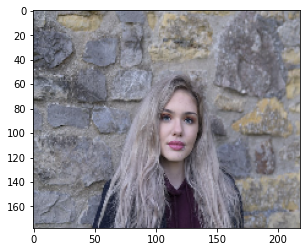

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

def pre_img(path): # 'Data/0061_0.jpg'
  img = image.load_img(path, target_size=(178, 218, 3))
  img = image.img_to_array(img)
  img /= 255.
  return img

## Print image
img = pre_img('w5.jpg') # Data/Test/173145.jpg

plt.imshow(img)

In [ ]:
## Predict image by model
img = np.expand_dims(img, axis=0)
proba = model.predict(img)


In [ ]:
def print_categories(vector, classes):
  j = 0
  for i in vector:
    print('{}, ({:.10f}%)'.format(classes[j], (i*100)))
    j += 1

In [ ]:
print_categories(proba[0], female_df.columns[1:])

Big_Nose, (1.1756410822%)
Pointy_Nose, (21.7218518257%)
Big_Lips, (5.5365778506%)
Wearing_Lipstick, (2.8697732836%)
Arched_Eyebrows, (1.7492372543%)
Bags_Under_Eyes, (3.9094094187%)
Bushy_Eyebrows, (1.2468204834%)
Eyeglasses, (0.2183039440%)
Narrow_Eyes, (15.1245951653%)
Heavy_Makeup, (3.2156948000%)
Oval_Face, (27.9778540134%)
Pale_Skin, (13.6420950294%)
Bangs, (1.4880360104%)
Black_Hair, (1.1166215874%)
Blond_Hair, (17.9984316230%)
Brown_Hair, (9.8903693259%)
Gray_Hair, (1.2437816709%)
Straight_Hair, (15.2804836631%)
Wavy_Hair, (9.0938508511%)
Wearing_Earrings, (6.5017543733%)
Wearing_Hat, (0.8992339484%)
Wearing_Necklace, (3.4943360835%)
High_Cheekbones, (7.0418626070%)
Rosy_Cheeks, (0.1837741234%)
Chubby, (0.2277859254%)
Double_Chin, (0.1894906862%)
